In [2]:
import pandas as pd                              
import seaborn as sns                            
import numpy as np                               
from sklearn.preprocessing import MinMaxScaler   
import statsmodels.api as sm                     
import statsmodels.formula.api as smf            
import matplotlib.pyplot as plt                  

In [18]:
#loading Dataset
corolla= pd.read_excel("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Multi Linear Regression\\ToyotaCorolla.xlsx")
corolla.shape

(1436, 38)

In [19]:
#[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] as per the Problem Statement we have to consider these Columns for Model Creation

In [20]:
#slecting specified columns for price prediction
df1=corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

# Permforming EDA

In [21]:
df1.shape

(1436, 9)

In [22]:
df1.describe() #Description of all the columns no.of counts, mean e.t.c

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [23]:
df1.info() #there are no NA values to impute or remove

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [24]:
from scipy import stats
dfzz=stats.zscore(df1) #converting data to zscores to remove outliers

df_abs=np.abs(dfzz) #converting to absoulte values |vals| 
df_filter=(df_abs<3).all(axis=1) #removing outliers which are above +3 and below -3
df_filter

0       True
1       True
2       True
3       True
4       True
        ... 
1431    True
1432    True
1433    True
1434    True
1435    True
Length: 1436, dtype: bool

In [25]:
df=df1[df_filter] #getting filtered data points without outliers

In [26]:
df.shape #we can see that 106 rows which were outliers have been removed , removing,replacing or retaining outliers to be done by consulting domain experts

(1330, 9)

In [27]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [28]:
df.corr() #Gears correlation 'r' can be seen as a constant, removing or retaining Gears column is insignificant

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.885765,-0.593380,0.204240,0.039781,0.183446,NaN,0.051608,0.483469
Age_08_04,-0.885765,1.000000,0.514762,-0.091991,-0.048811,-0.127917,NaN,-0.093871,-0.428461
KM,-0.593380,0.514762,1.000000,-0.285734,0.313393,-0.021665,NaN,0.318500,0.029940
HP,0.204240,-0.091991,-0.285734,1.000000,0.055884,0.151938,NaN,-0.386229,0.008234
cc,0.039781,-0.048811,0.313393,0.055884,1.000000,0.137848,NaN,0.635694,0.686791
Doors,0.183446,-0.127917,-0.021665,0.151938,0.137848,1.000000,NaN,0.100945,0.411108
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarterly_Tax,0.051608,-0.093871,0.318500,-0.386229,0.635694,0.100945,NaN,1.000000,0.578068
Weight,0.483469,-0.428461,0.029940,0.008234,0.686791,0.411108,NaN,0.578068,1.000000


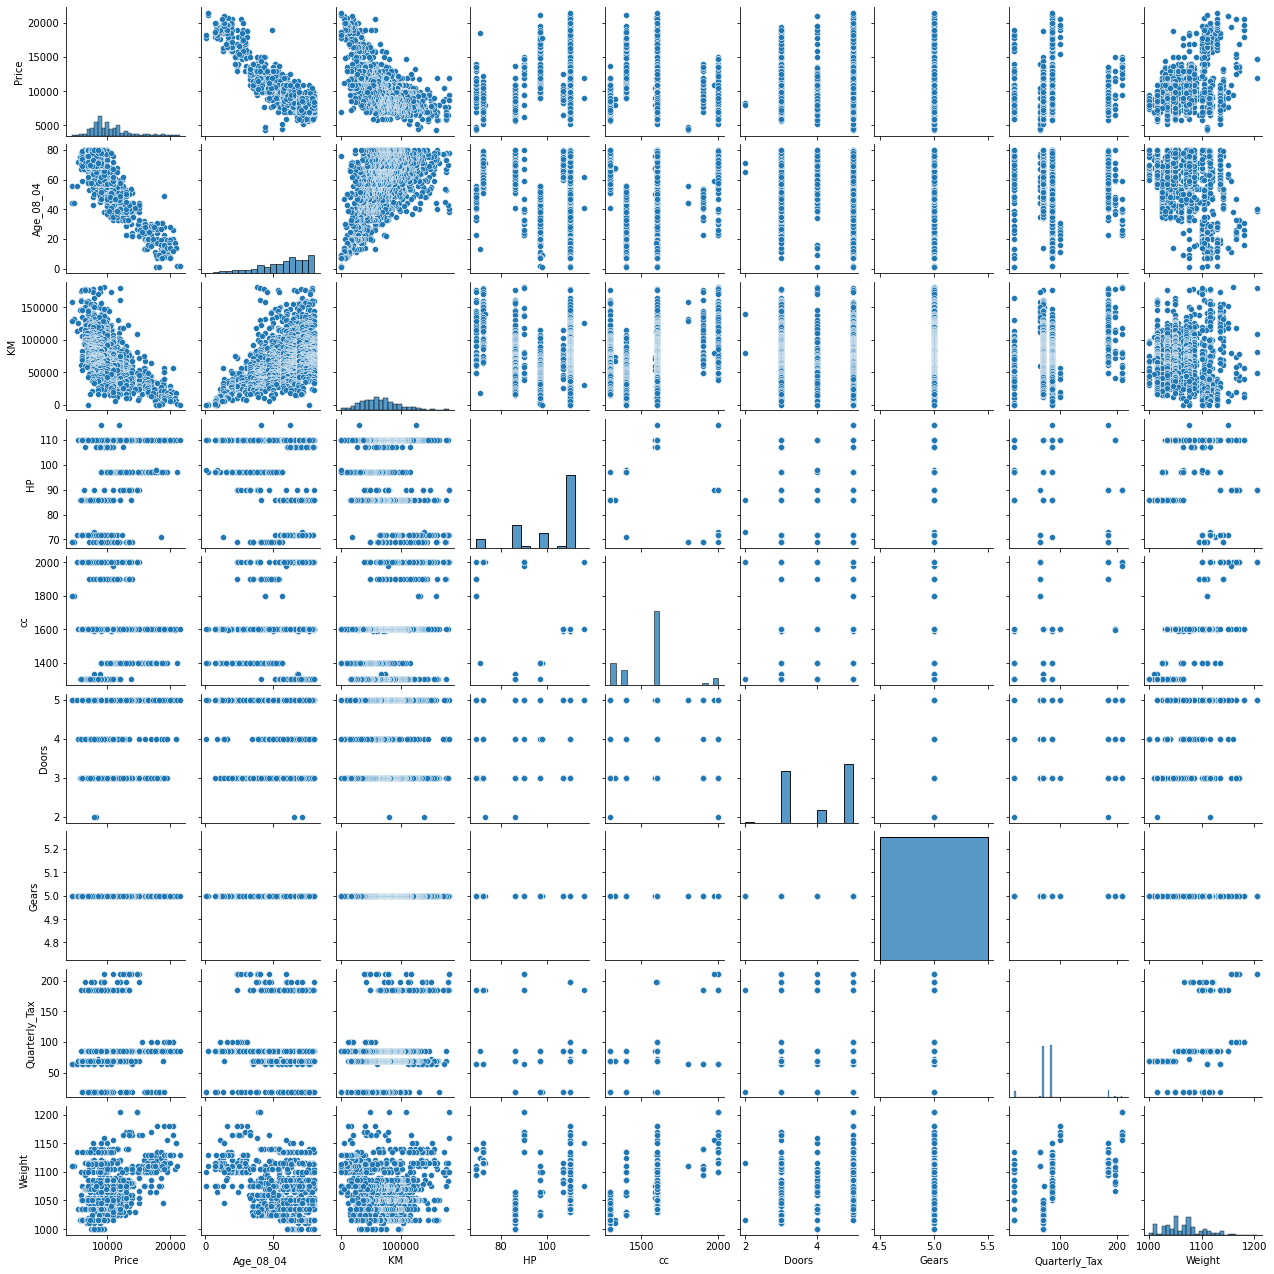

In [29]:
sns.pairplot(df,height=2) #here is pairplot which shows scatterplot which shows relationship between 2 columns 

# Correlation is used to test for multi-collinearity between independent variables.

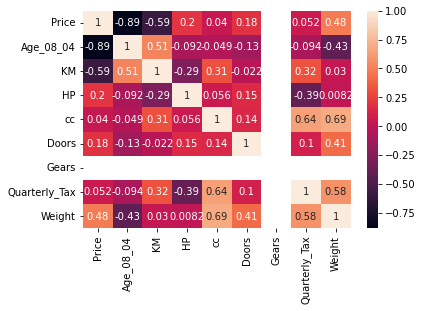

In [30]:
sns.heatmap(df.corr(),annot=True); #it is evident that Multicollinearity between independent variables is not present hence no need of further analysis for VIF and simple L.R between independent variables

In [31]:
#drop Gears column as the correlation between Price and Gears= 0
df2=df.drop('Gears',axis=1)
df2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,210,1165
1,13750,23,72937,90,2000,3,210,1165
2,13950,24,41711,90,2000,3,210,1165
3,14950,26,48000,90,2000,3,210,1165
4,13750,30,38500,90,2000,3,210,1170


In [32]:
import sweetviz as sv
sweet_report=sv.analyze(df2)
sweet_report.show_html('Corolla_Report.html') # a summary level report of EDA

                                             |          | [  0%]   00:00 -> (? left)

Report Corolla_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
norm= MinMaxScaler(feature_range=(0,1)) # Normalizing Data 
columns= df2.columns
d=norm.fit_transform(df2)
normdf=pd.DataFrame(d,columns=columns)
normdf

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.533528,0.278481,0.260107,0.446809,1.000000,0.333333,1.00000,0.804878
1,0.548105,0.278481,0.403771,0.446809,1.000000,0.333333,1.00000,0.804878
2,0.559767,0.291139,0.230905,0.446809,1.000000,0.333333,1.00000,0.804878
3,0.618076,0.316456,0.265721,0.446809,1.000000,0.333333,1.00000,0.804878
4,0.548105,0.367089,0.213129,0.446809,1.000000,0.333333,1.00000,0.829268
...,...,...,...,...,...,...,...,...
1325,0.183673,0.860759,0.113725,0.361702,0.000000,0.333333,0.26178,0.121951
1326,0.378717,0.898734,0.105178,0.361702,0.000000,0.333333,0.26178,0.073171
1327,0.241983,0.886076,0.094194,0.361702,0.000000,0.333333,0.26178,0.073171
1328,0.169096,0.873418,0.093641,0.361702,0.000000,0.333333,0.26178,0.073171


In [34]:
import sweetviz as sv   #normalized detailed EDA report of the dataset 
sweet_report=sv.analyze(normdf)
sweet_report.show_html('Normalized df Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Normalized df Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [35]:
normdf.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

# Using the Lazypredict module, we can determine which Regression Algorithm best fits our data by producing less error (lower RMSE value) and producing the highest accuracy (between 75% and 95%) via adjusted R-Squared Value.

In [36]:
from lazypredict.Supervised import LazyRegressor
X=normdf.iloc[:,1:]
Y=normdf.iloc[:,:1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None,)
models,predictions=reg.fit(x_train,x_test,y_train,y_test)
print(models)


 29%|██▊       | 12/42 [00:00<00:01, 23.36it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████| 42/42 [00:14<00:00,  2.81it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.88       0.88  0.06        0.07
HistGradientBoostingRegressor                0.88       0.88  0.06        1.04
LGBMRegressor                                0.88       0.88  0.06        0.28
RandomForestRegressor                        0.87       0.88  0.06        0.17
NuSVR                                        0.87       0.87  0.06        0.08
BaggingRegressor                             0.86       0.87  0.06        0.03
XGBRegressor                                 0.86       0.86  0.06        0.17
ExtraTreesRegressor                          0.86       0.86  0.06        0.14
KNeighborsRegressor                          0.85       0.85  0.07        0.03
SVR                                          0.85       0.85  0.07        0.01
OrthogonalMatchingPursuitCV                  0.84   

### We can see that utilising LazyRegressor, we discovered that the GradientBoosting Regression technique provided the best accuracy (88%) and RMSE value (0.06).


### Let's check using the Ordinary Least Squares Method and transform datasets with cbrt, sqrt, log1p, tanh, and so on, then choose the best model with transformation. 

# Model1 Creation

In [37]:
#not including Gears column because of 0.05 correlation and there is no collinearty between the independent variable hence no analysis for VIF
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=normdf).fit()

In [38]:
model.params #model parameters the formula will be Price'y'=Age_08_04.(x1)+KM.(x2)+HP.(x3)+cc.(x4)+Doors.(x5)+Quarterly_Tax.(x6)+Weight.(x7)+Intercept , here x1,x2 are columns of 1 record

Intercept        0.68
Age_08_04       -0.51
KM              -0.18
HP               0.07
cc              -0.12
Doors           -0.02
Quarterly_Tax    0.01
Weight           0.34
dtype: float64

In [39]:
print(model.tvalues,'/n',model.pvalues)
#here Quarterly_Tax- column pvalue is 0.5>0.05 accept null hypothesis stating price is not dependent on Quarterly_Tax variables

Intercept        55.73
Age_08_04       -44.06
KM              -13.66
HP                8.08
cc               -9.25
Doors            -3.00
Quarterly_Tax     0.60
Weight           17.13
dtype: float64 /n Intercept       0.00
Age_08_04       0.00
KM              0.00
HP              0.00
cc              0.00
Doors           0.00
Quarterly_Tax   0.55
Weight          0.00
dtype: float64


In [40]:
model.rsquared,model.rsquared_adj,model.aic

(0.8570876990754327, 0.856330977361006, -3397.182212365614)

# Normality of Residuals(Q-Q Plot)


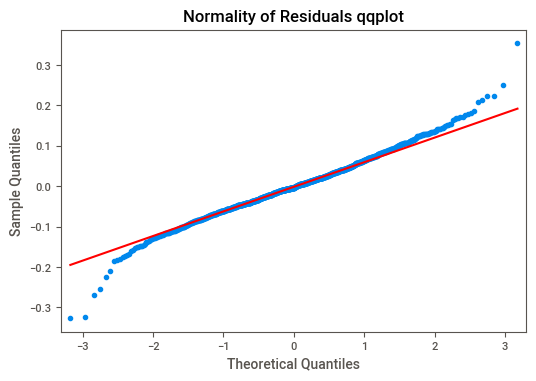

In [41]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normality of Residuals qqplot")
plt.show()

# Residuals for homoscedasticity

In [42]:
#Residuals vs Fitted Values(predicted)
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

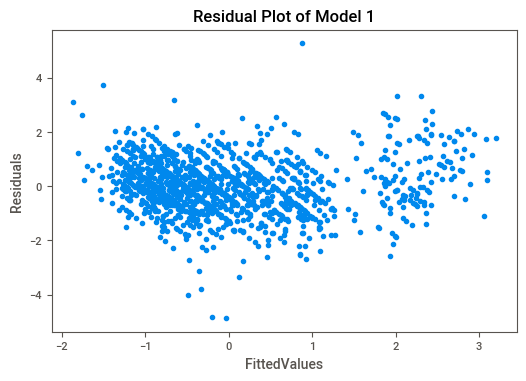

In [43]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot of Model 1")
plt.xlabel("FittedValues")
plt.ylabel("Residuals")
plt.show()

eval_env: 1


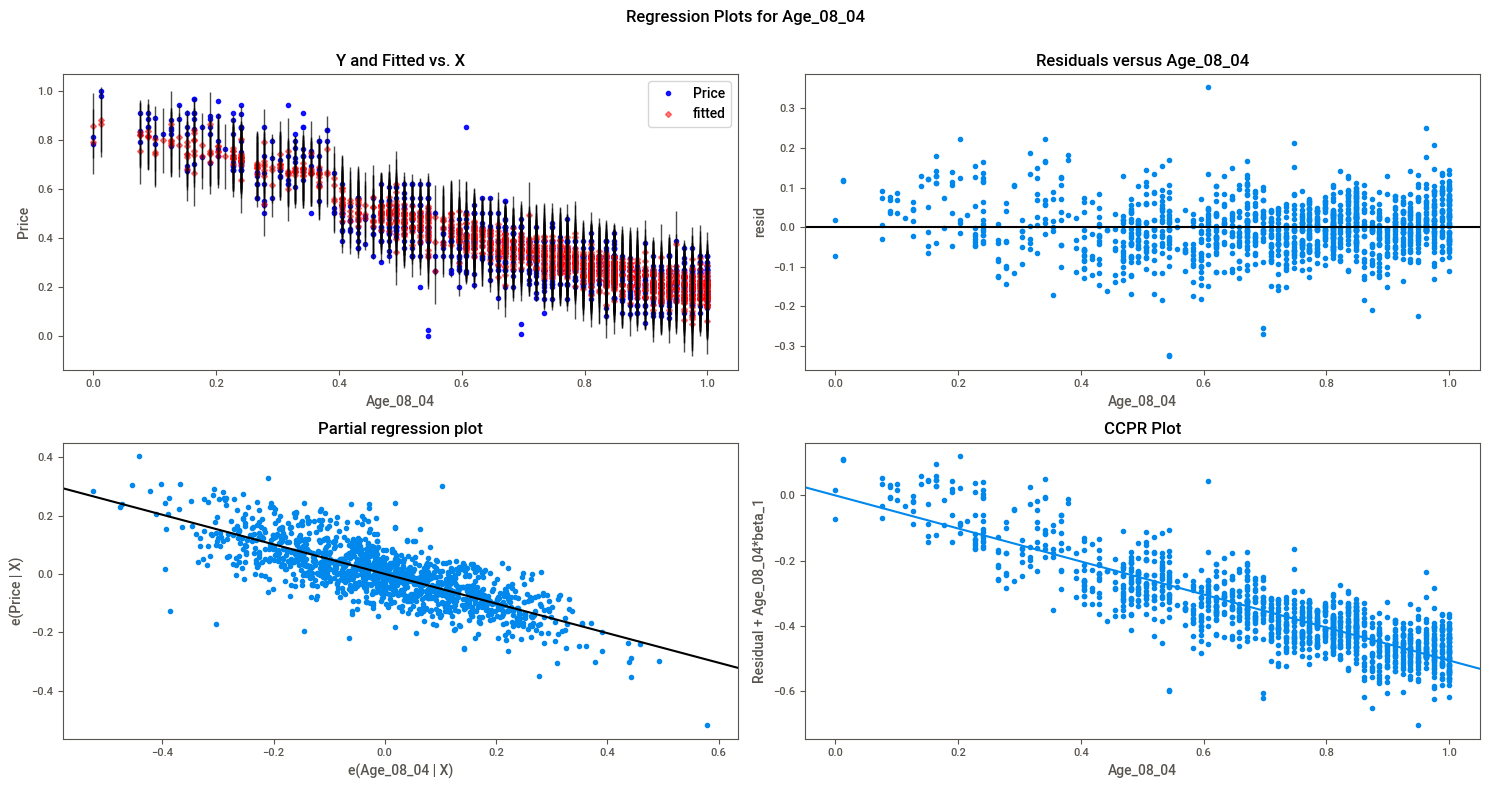

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig) # Residuals vs Age_08_04 column
plt.show()

In [45]:
normdf.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

eval_env: 1


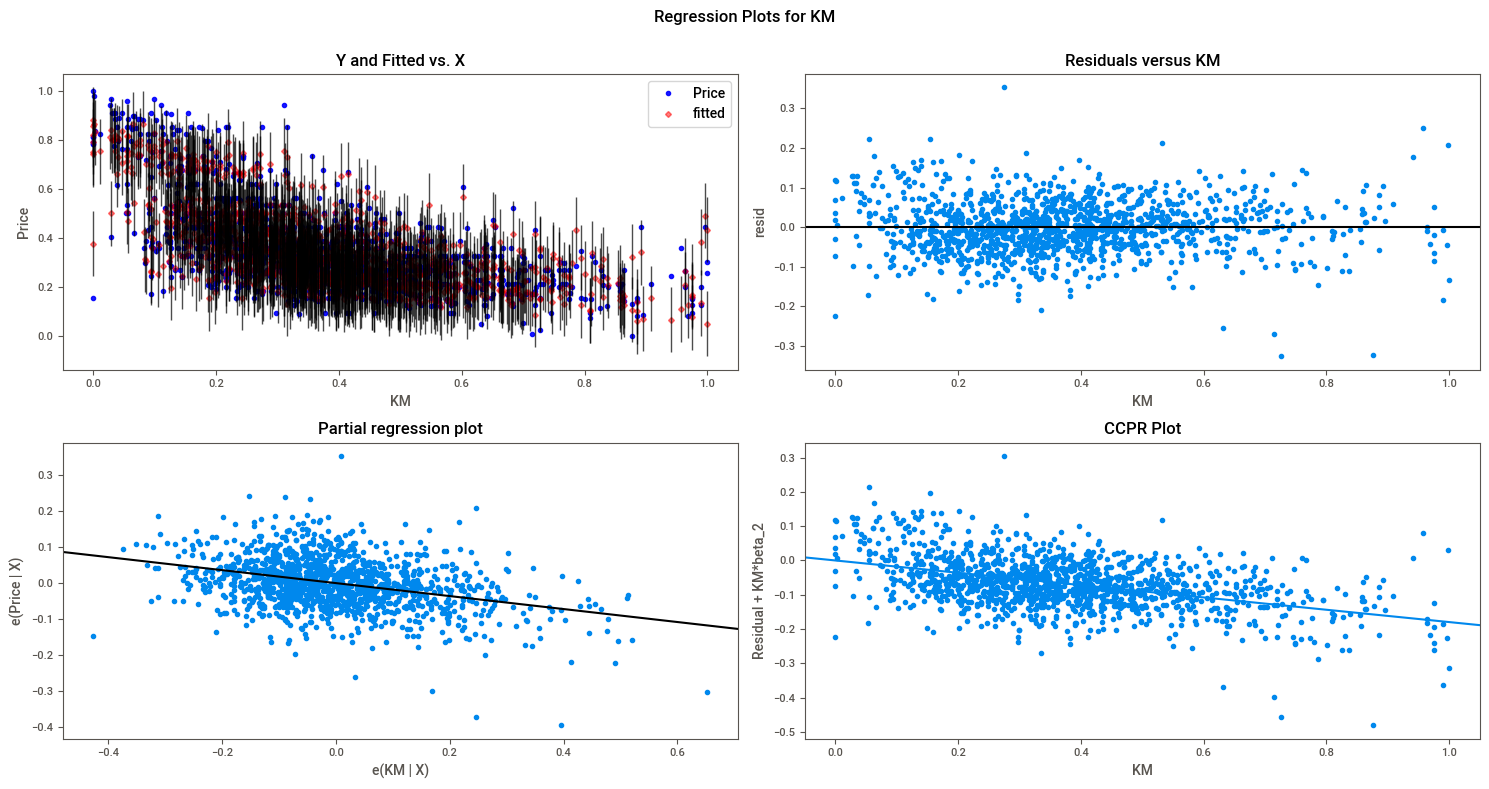

In [46]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig) #Residuals vs KM column
plt.show()


eval_env: 1


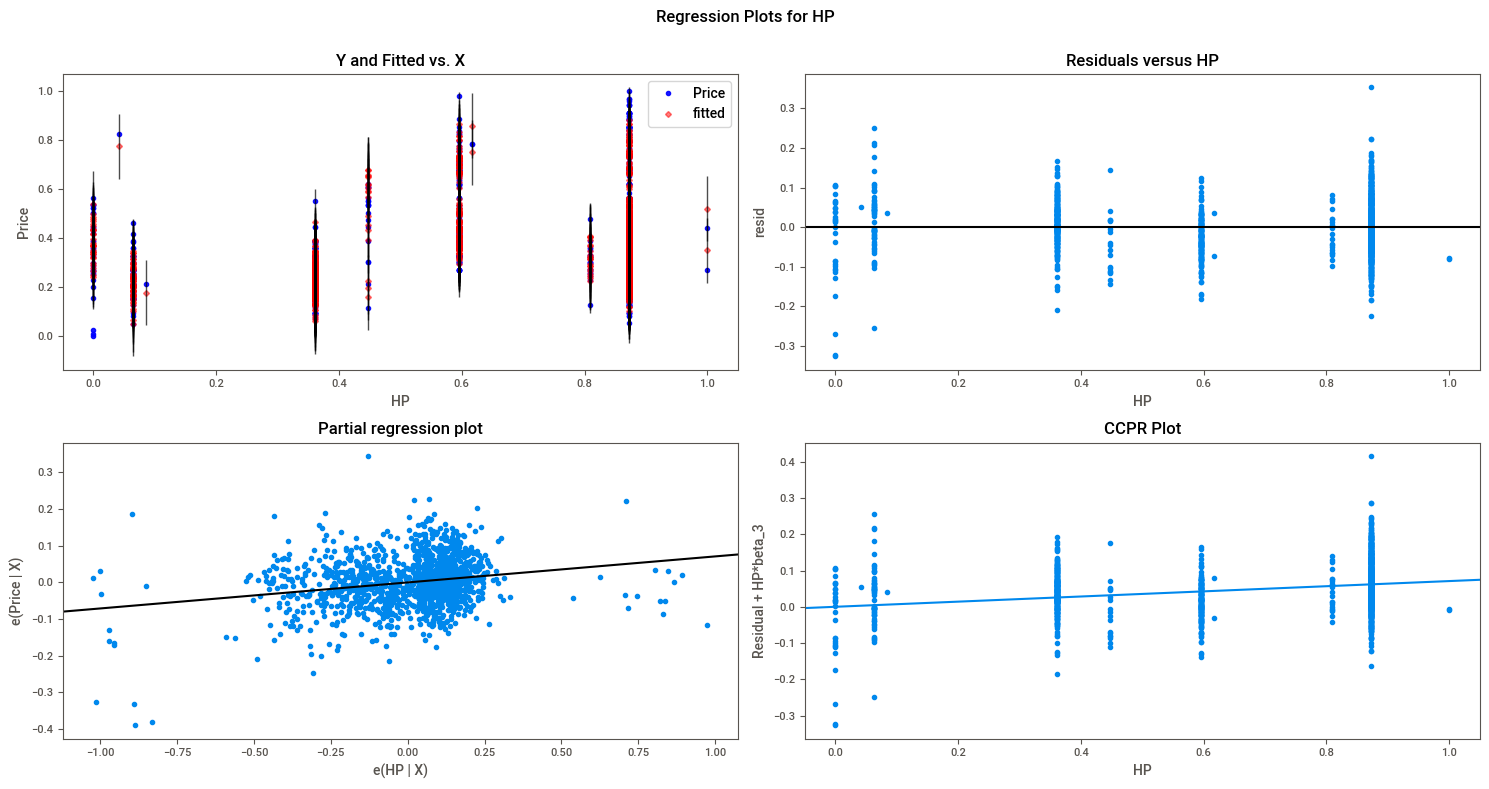

In [47]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig) #Residuals vs HP column
plt.show()

eval_env: 1


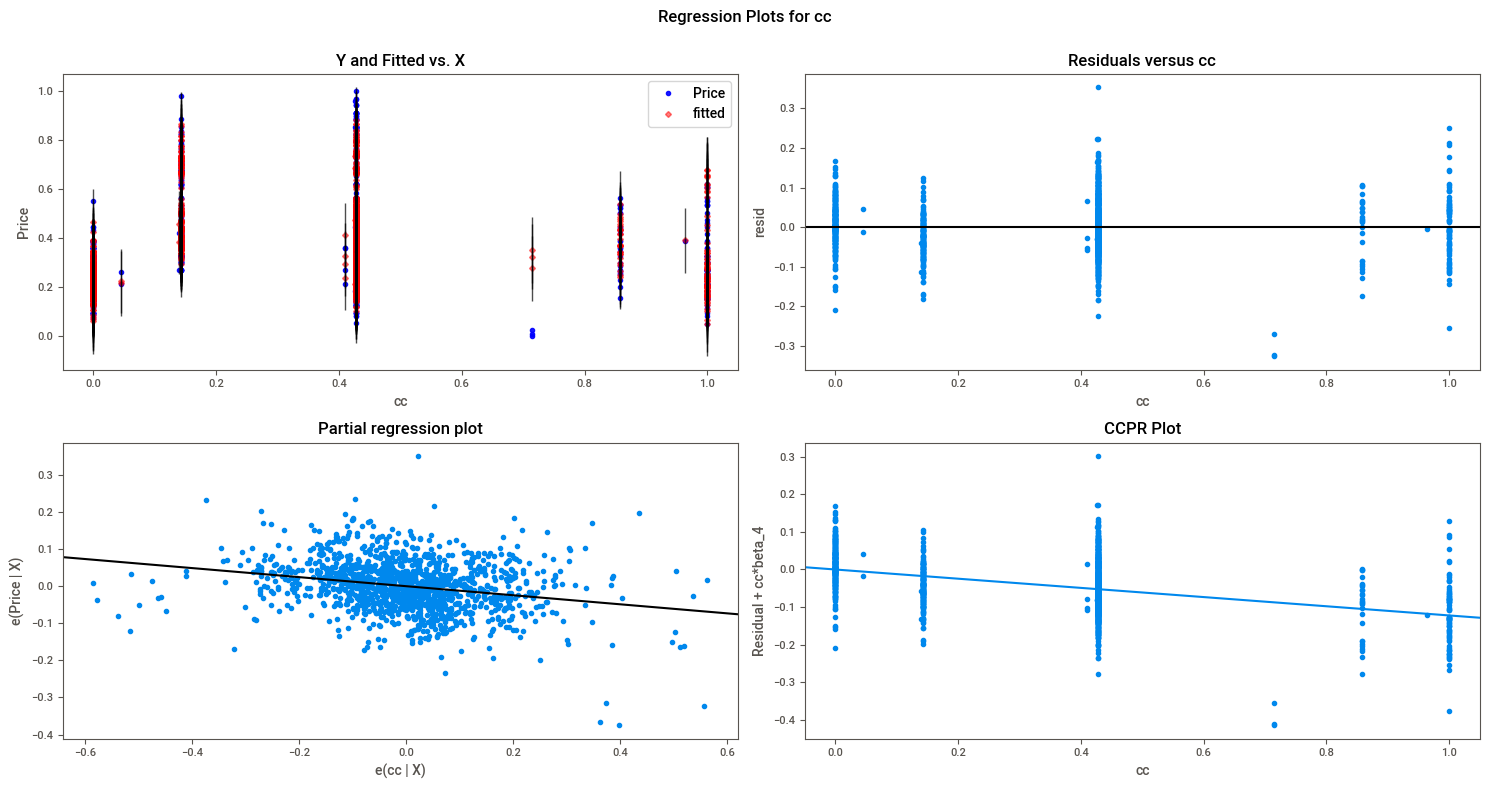

In [48]:
fig=plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"cc",fig=fig) #Residuals vs cc column
plt.show()

eval_env: 1


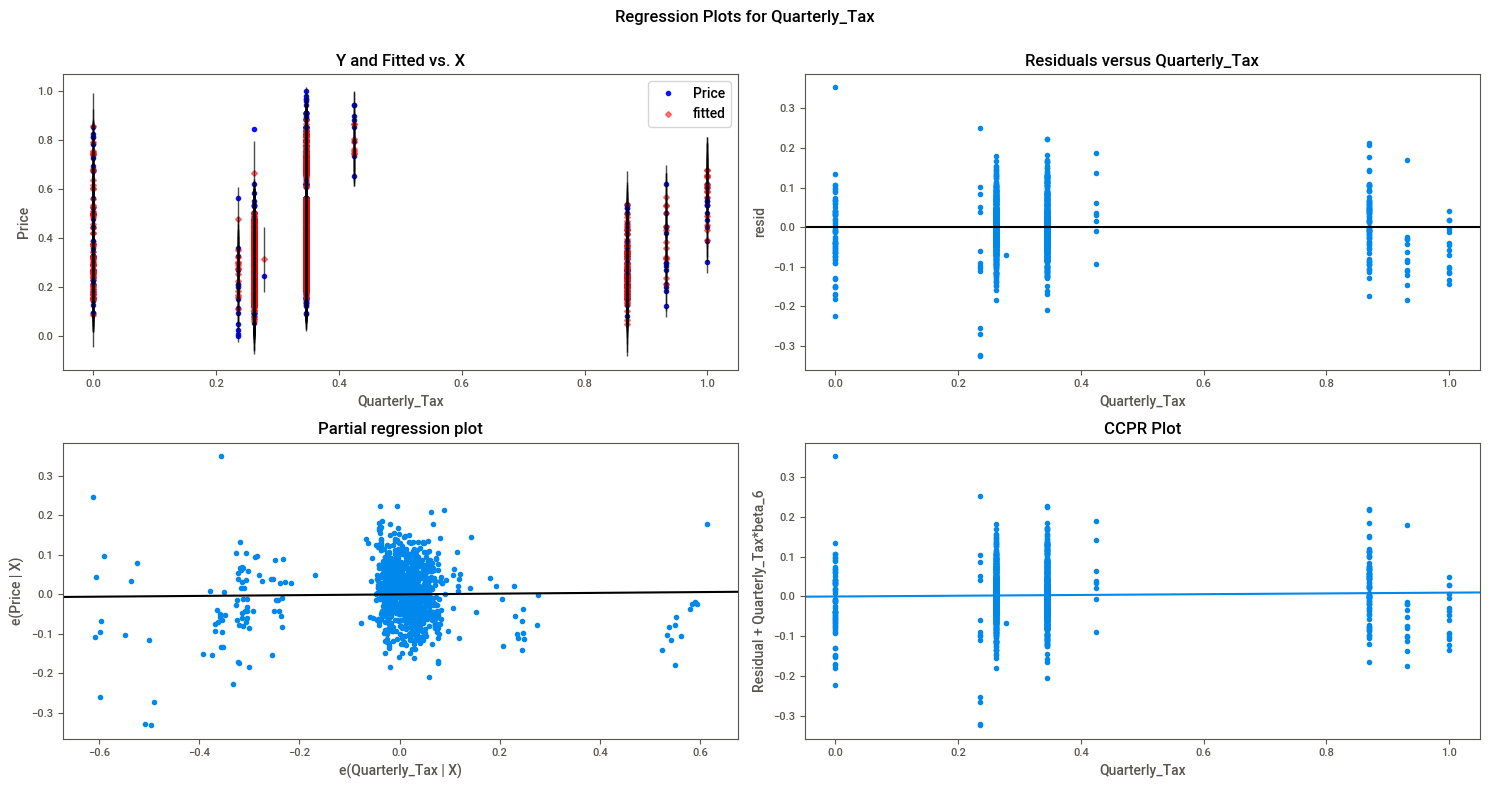

In [49]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig) #Resdiuals vs Quarterly_Tax , here we can see in CCPR plot there is barely any affect the regression line is =0.0000
plt.show()

eval_env: 1


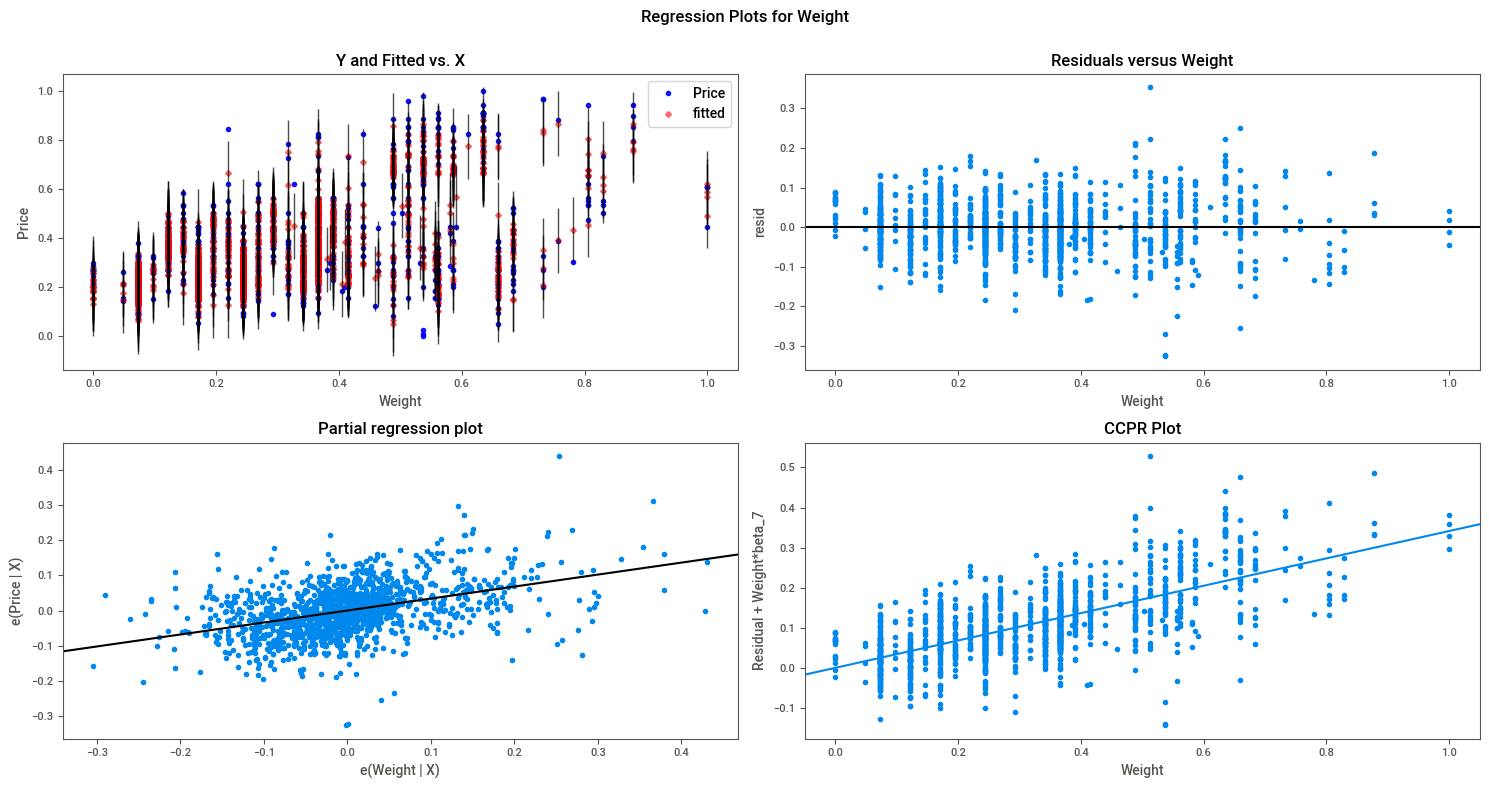

In [50]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig) #Residuals vs Weight
plt.show()

eval_env: 1


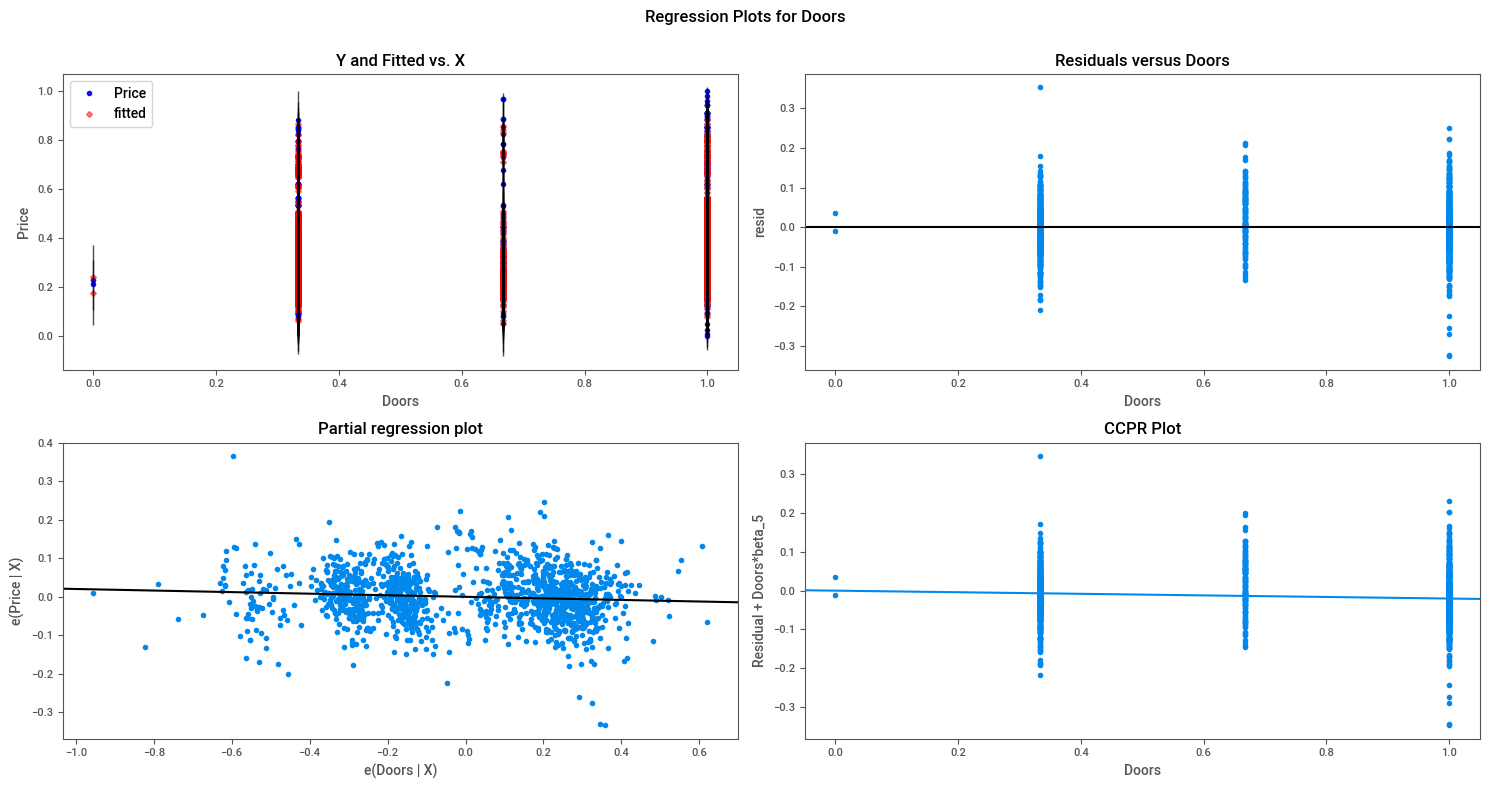

In [51]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig) #Residuals vs Doors , here too we can see barely any change in CCPR plot which is = 0.000
plt.show()

In [52]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

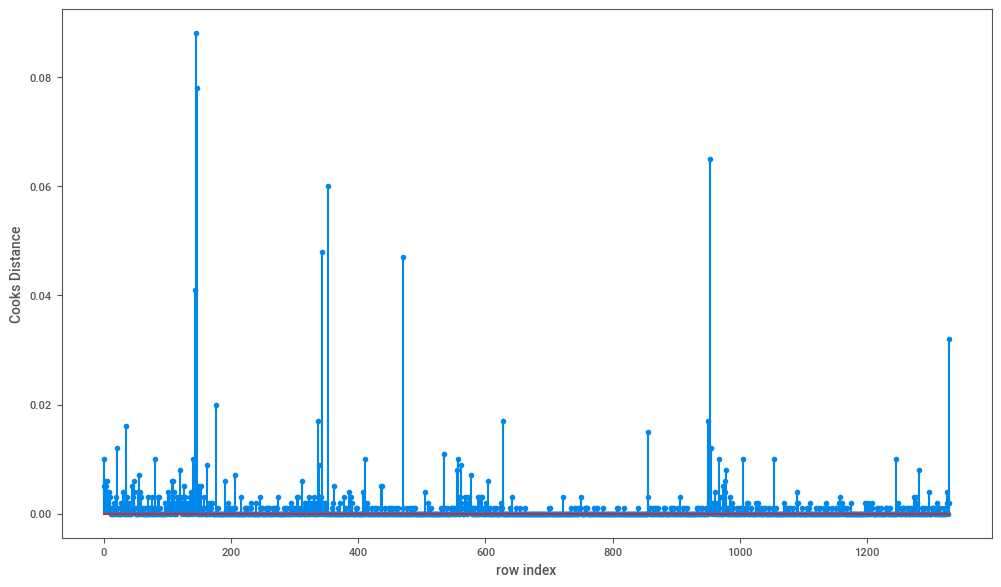

In [53]:
#cooks distance using stem plot 
fig=plt.subplots(figsize=(12,7))
plt.stem(np.arange(len(normdf)),np.round(c,3))
plt.ylabel("Cooks Distance")
plt.xlabel("row index")
plt.show() #Here we can see that the influencing data points are below 1 hence there are no High Influencing points to remove in dataset

In [54]:
normdf.shape

(1330, 8)

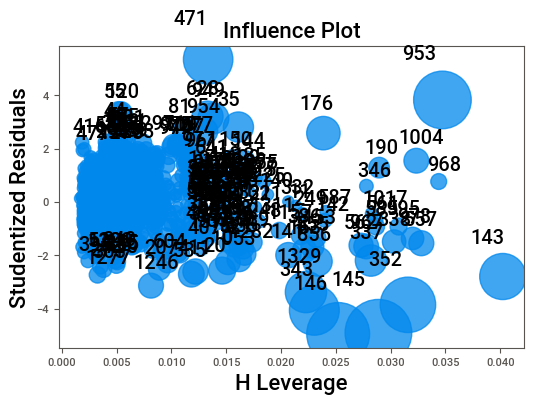

In [55]:
from statsmodels.graphics.regressionplots import influence_plot # Bubble plot shows high influencing points with data point nos. as per columns with bigger bubble it shows how much its affecting the model
influence_plot(model)
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
import math

In [57]:
mse_m1= mean_squared_error(normdf.Price,model.fittedvalues) #checking for RMSE value 
rmse_m1=math.sqrt(mse_m1)
print("the difference between actual and predicted values of model1 is :---",rmse_m1)


the difference between actual and predicted values of model1 is :--- 0.06706521727533687


# Model2 Building by removing Quarterly_Tax column as its pvalue was >0.05

In [58]:
#Model creation
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight',data=normdf).fit()

In [59]:
print(model2.rsquared,model2.aic,'-----', model.rsquared,model.aic)
#after removing Quarterly_Tax column there is barely any change in accuracy

0.8570485319677515 -3398.8177572705736 ----- 0.8570876990754327 -3397.182212365614


In [60]:
#Cook's Distance 
model2_influence=model2.get_influence()
(c1,_)=model2_influence.cooks_distance

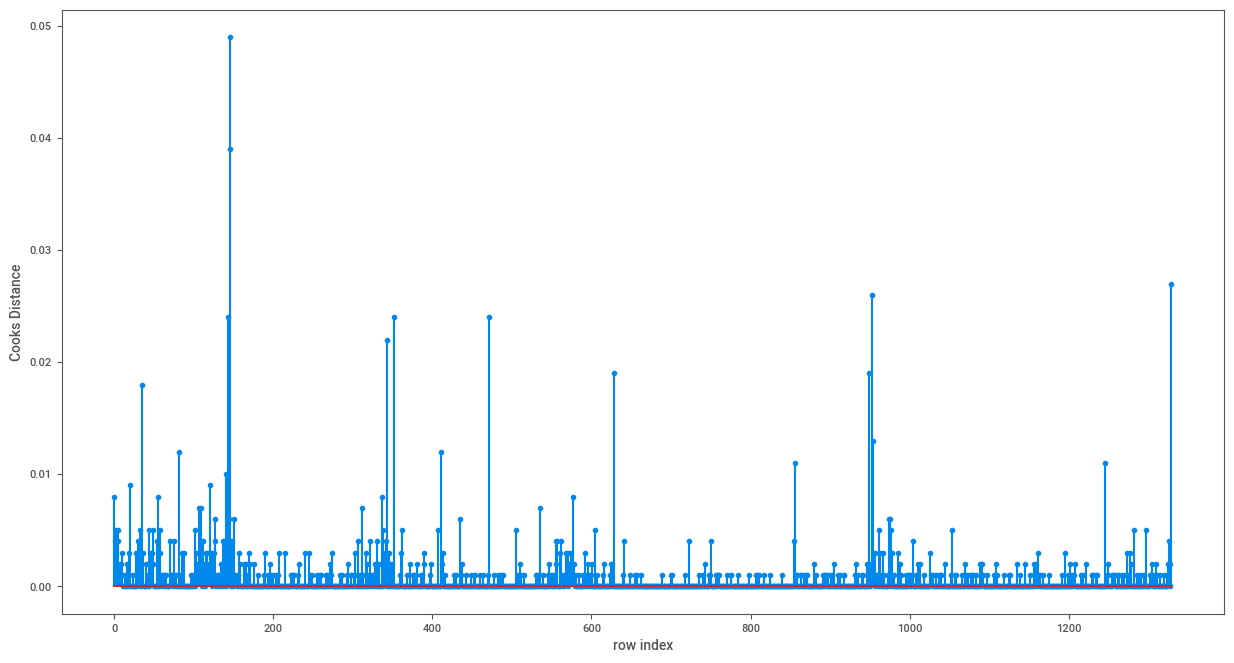

In [61]:
fig=plt.subplots(figsize=(15,8))
plt.stem(np.arange(len(normdf)),np.round(c1,3))
plt.xlabel("row index")
plt.ylabel("Cooks Distance")
plt.show()
#the datapoint dropped from 0.08 to 0.05 in Cooks distance after removing Quarterly_Tax column

In [62]:
model2.tvalues , '\n', model2.pvalues #no major changes just insignificant changes in tvalues and p values

(Intercept    61.80
 Age_08_04   -44.15
 KM          -13.66
 HP            9.02
 cc           -9.91
 Doors        -3.00
 Weight       17.64
 dtype: float64,
 '\n',
 Intercept   0.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 cc          0.00
 Doors       0.00
 Weight      0.00
 dtype: float64)

In [63]:
model2.rsquared, model2.aic, '--------', model.rsquared,model.aic 
#comparing model2 and 1st model R2 coefficient of determination to get the accuracy difference in both model

(0.8570485319677515,
 -3398.8177572705736,
 '--------',
 0.8570876990754327,
 -3397.182212365614)

In [64]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

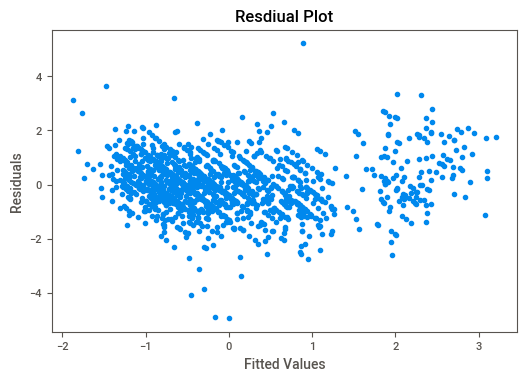

In [65]:
plt.scatter(get_standardized_values(model2.fittedvalues),get_standardized_values(model2.resid)) #scatter plot
plt.title("Resdiual Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [66]:
mse_m2= mean_squared_error(normdf.Price,model2.fittedvalues) #checking for RMSE value 
rmse_m2=math.sqrt(mse_m2)
print("the difference between actual and predicted values of model2 is :---",rmse_m2)



the difference between actual and predicted values of model2 is :--- 0.06707440672446038


# Creating Model 3 by transforming datapoints  using inverse tan Transformation

In [67]:
normdf['Age_08_04'].apply(lambda x: float(x))
normdf['KM'].apply(lambda x: float(x))
normdf['HP'].apply(lambda x: float(x))
normdf['cc'].apply(lambda x: float(x))
normdf['Doors'].apply(lambda x: float(x))
normdf['Weight'].apply(lambda x: float(x))
normdf1=['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax','Weight']

#normdf['Age_08_04']= np.arctan(normdf['Age_08_04']) #tranforming data to inverse tan on  all the columns to avoid pattern in residuals vs fitted Values
#normdf['KM']=np.arctan(normdf['KM'])
#normdf['HP']=np.arctan(normdf['HP'])
#normdf['cc']=np.arctan(normdf['cc'])
#normdf['Doors']=np.arctan(normdf['Doors'])
#normdf['Weight']=np.arctan(normdf['Weight'])
#normdf['Price']=np.arctan(normdf['Price'])
normdf_arctan=np.arctan(normdf)
normdf_arctan


,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.49,0.27,0.25,0.42,0.79,0.32,0.79,0.68
1,0.50,0.27,0.38,0.42,0.79,0.32,0.79,0.68
2,0.51,0.28,0.23,0.42,0.79,0.32,0.79,0.68
3,0.55,0.31,0.26,0.42,0.79,0.32,0.79,0.68
4,0.50,0.35,0.21,0.42,0.79,0.32,0.79,0.69
...,...,...,...,...,...,...,...,...
1325,0.18,0.71,0.11,0.35,0.00,0.32,0.26,0.12
1326,0.36,0.73,0.10,0.35,0.00,0.32,0.26,0.07
1327,0.24,0.73,0.09,0.35,0.00,0.32,0.26,0.07
1328,0.17,0.72,0.09,0.35,0.00,0.32,0.26,0.07


In [68]:
model3=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight',data=normdf_arctan).fit()

In [69]:
model3.params

Intercept    0.67
Age_08_04   -0.60
KM          -0.18
HP           0.07
cc          -0.06
Doors       -0.00
Weight       0.22
dtype: float64

In [70]:
model3.tvalues , model3.pvalues # here Doors Column is also insignicant as the pvalue is greater than 0.05

(Intercept    63.07
 Age_08_04   -43.79
 KM          -13.78
 HP            8.20
 cc           -4.89
 Doors        -0.16
 Weight       11.35
 dtype: float64,
 Intercept   0.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 cc          0.00
 Doors       0.88
 Weight      0.00
 dtype: float64)

# Again creating Model3 without Doors Column

In [71]:
model3=smf.ols('Price~Age_08_04+KM+HP+cc+Weight',data=normdf_arctan).fit()


In [72]:
model3.params


Intercept    0.67
Age_08_04   -0.60
KM          -0.18
HP           0.07
cc          -0.06
Weight       0.21
dtype: float64

In [73]:
model3.tvalues , model3.pvalues # here Doors Column is also insignicant as the pvalue is greater than 0.05


(Intercept    63.16
 Age_08_04   -44.40
 KM          -13.80
 HP            8.38
 cc           -5.05
 Weight       12.83
 dtype: float64,
 Intercept   0.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 cc          0.00
 Weight      0.00
 dtype: float64)

In [74]:
model3.rsquared, model2.rsquared, model.rsquared #comparing all the 3 models for Rsquared

(0.8525151918678591, 0.8570485319677515, 0.8570876990754327)

# Residual Plot for Homoscedasticity


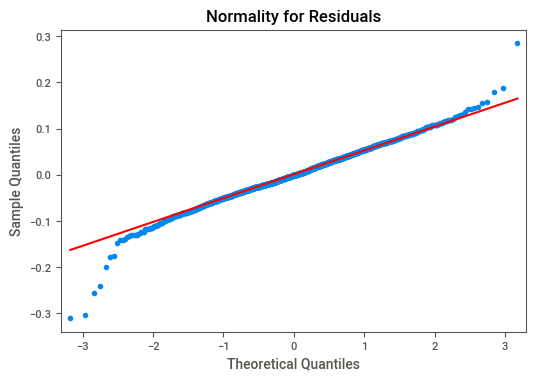

In [75]:
qqplot3=sm.qqplot(model3.resid,line='q')
plt.title("Normality for Residuals")
plt.show()


# Residual Analysis

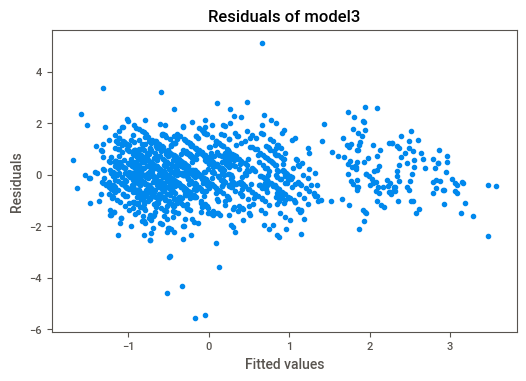

In [76]:
plt.scatter(get_standardized_values(model3.fittedvalues), get_standardized_values(model3.resid))
plt.title("Residuals of model3")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show() 
#Now Residuals are randomly distributed and there is no pattern so we can go with model3 even though accuracy got dipped to 74%

In [77]:
mse_m3= mean_squared_error(normdf_arctan.Price,model3.fittedvalues) #checking for RMSE value 
rmse_m3=math.sqrt(mse_m3)
print("the difference between actual and predicted values of model3 is :---",rmse_m3)

the difference between actual and predicted values of model3 is :--- 0.05564228488769435


# Model 4  creation by transforming Data using log1p

In [78]:
#normdf1['Age_08_04']= np.log1p(normdf['Age_08_04']) #tranforming data to inverse tan on  all the columns to avoid pattern in residuals vs fitted Values
#normdf1['KM']=np.log1p(normdf['KM'])
#normdf1['HP']=np.log1p(normdf['HP'])
#normdf1['cc']=np.log1p(normdf['cc'])
##normdf1['Doors']=np.log1p(normdf['Doors'])
#normdf1['Weight']=np.log1p(normdf['Weight'])
#normdf1['Price']=np.log1p(normdf['Price'])
normdf_log1p=np.log1p(normdf)
normdf_log1p

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.43,0.25,0.23,0.37,0.69,0.29,0.69,0.59
1,0.44,0.25,0.34,0.37,0.69,0.29,0.69,0.59
2,0.44,0.26,0.21,0.37,0.69,0.29,0.69,0.59
3,0.48,0.27,0.24,0.37,0.69,0.29,0.69,0.59
4,0.44,0.31,0.19,0.37,0.69,0.29,0.69,0.60
...,...,...,...,...,...,...,...,...
1325,0.17,0.62,0.11,0.31,0.00,0.29,0.23,0.12
1326,0.32,0.64,0.10,0.31,0.00,0.29,0.23,0.07
1327,0.22,0.63,0.09,0.31,0.00,0.29,0.23,0.07
1328,0.16,0.63,0.09,0.31,0.00,0.29,0.23,0.07


In [79]:
model4=smf.ols('Price~Age_08_04+KM+HP+cc+Weight',data=normdf_log1p).fit()

In [80]:
model4.params

Intercept    0.58
Age_08_04   -0.58
KM          -0.18
HP           0.07
cc          -0.06
Weight       0.23
dtype: float64

In [81]:
model4.tvalues, '\n',model4.pvalues

(Intercept    63.66
 Age_08_04   -44.00
 KM          -13.84
 HP            8.44
 cc           -5.63
 Weight       13.52
 dtype: float64,
 '\n',
 Intercept   0.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 cc          0.00
 Weight      0.00
 dtype: float64)

In [82]:
model4.rsquared

0.8507053805503325

# Residual Plot for Homoscedasticity


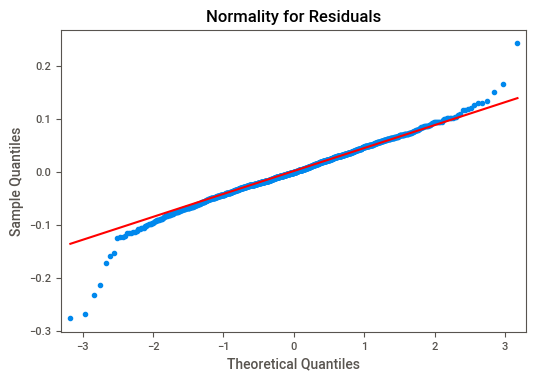

In [83]:
qqplot4=sm.qqplot(model4.resid,line='q')
plt.title("Normality for Residuals")
plt.show()



# Residual Analysis

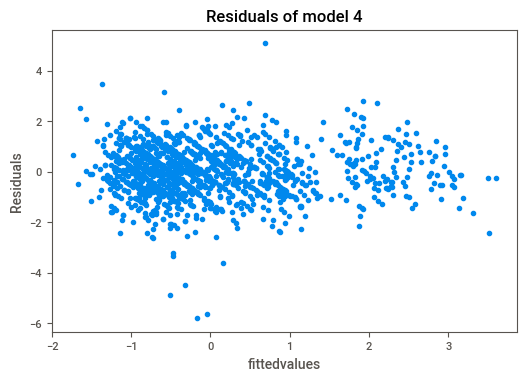

In [84]:
plt.scatter(get_standardized_values(model4.fittedvalues),
           get_standardized_values(model4.resid))
plt.title('Residuals of model 4')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

In [85]:

mse_m4= mean_squared_error(normdf_log1p.Price,model4.fittedvalues) #checking for RMSE value 
rmse_m4=math.sqrt(mse_m4)
print("the difference between actual and predicted values of model4 is :---",rmse_m4)

the difference between actual and predicted values of model4 is :--- 0.0475520031591886


# Model 5 Creation transforming Dataset using Cube Root

In [86]:
#normdf1['Age_08_04']= np.cbrt(normdf['Age_08_04']) #tranforming data to inverse tan on  all the columns to avoid pattern in residuals vs fitted Values
#normdf1['KM']=np.cbrt(normdf['KM'])
#normdf1['HP']=np.cbrt(normdf['HP'])
#normdf1['cc']=np.cbrt(normdf['cc'])
#normdf1['Doors']=np.cbrt(normdf['Doors'])
#normdf1['Weight']=np.cbrt(normdf['Weight'])
#normdf1['Price']=np.cbrt(normdf['Price'])
normdf_cbrt=np.cbrt(normdf)
normdf_cbrt

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.81,0.65,0.64,0.76,1.00,0.69,1.00,0.93
1,0.82,0.65,0.74,0.76,1.00,0.69,1.00,0.93
2,0.82,0.66,0.61,0.76,1.00,0.69,1.00,0.93
3,0.85,0.68,0.64,0.76,1.00,0.69,1.00,0.93
4,0.82,0.72,0.60,0.76,1.00,0.69,1.00,0.94
...,...,...,...,...,...,...,...,...
1325,0.57,0.95,0.48,0.71,0.00,0.69,0.64,0.50
1326,0.72,0.97,0.47,0.71,0.00,0.69,0.64,0.42
1327,0.62,0.96,0.45,0.71,0.00,0.69,0.64,0.42
1328,0.55,0.96,0.45,0.71,0.00,0.69,0.64,0.42


In [87]:
model5=smf.ols('Price~Age_08_04+KM+HP+cc+Weight',data=normdf_cbrt).fit()


In [88]:
model5.params


Intercept    1.18
Age_08_04   -0.59
KM          -0.15
HP           0.07
cc          -0.01
Weight       0.13
dtype: float64

In [89]:
model5.tvalues, '\n',model5.pvalues #here we can see that 'cc' column p value >0.05,hence again create model5 without 'cc' column


(Intercept    56.65
 Age_08_04   -29.89
 KM           -9.00
 HP            7.84
 cc           -1.61
 Weight        7.72
 dtype: float64,
 '\n',
 Intercept   0.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 cc          0.11
 Weight      0.00
 dtype: float64)

In [90]:
model5=smf.ols('Price~Age_08_04+KM+HP+Weight',data=normdf_cbrt).fit()

In [91]:
model5.params

Intercept    1.19
Age_08_04   -0.60
KM          -0.16
HP           0.07
Weight       0.11
dtype: float64

In [92]:
model5.tvalues, '\n',model5.pvalues 

(Intercept    61.46
 Age_08_04   -29.93
 KM           -9.35
 HP            7.70
 Weight        9.13
 dtype: float64,
 '\n',
 Intercept   0.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 Weight      0.00
 dtype: float64)

In [93]:
model5.rsquared , model5.rsquared_adj


(0.7272614696301545, 0.726438108029038)


# Residual Plot for Homoscedasticity


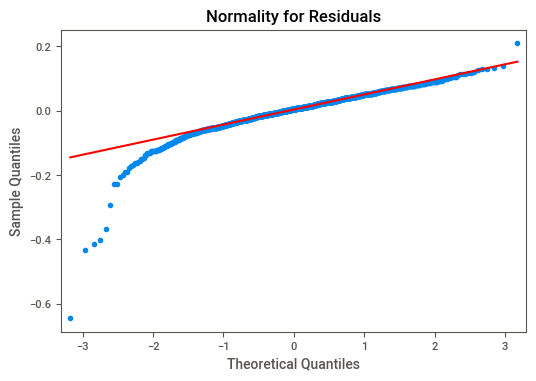

In [94]:
qqplot5=sm.qqplot(model5.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

# Residuals Analysis


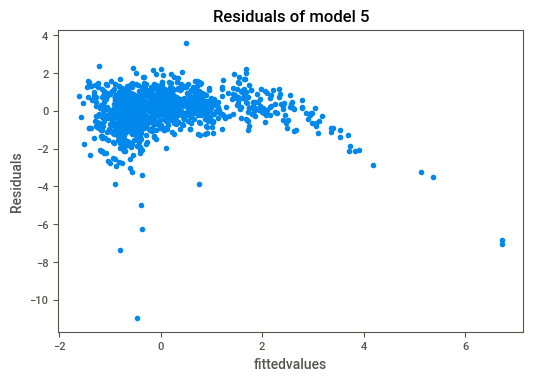

In [95]:
plt.scatter(get_standardized_values(model5.fittedvalues),
           get_standardized_values(model5.resid))
plt.title('Residuals of model 5')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

# RMSE- Root Mean Squared Error


In [96]:
mse_m5= mean_squared_error(normdf_cbrt.Price,model5.fittedvalues) #checking for RMSE value 
rmse_m5=math.sqrt(mse_m5)
print("the difference between actual and predicted values of model5 is :---",rmse_m5)


the difference between actual and predicted values of model5 is :--- 0.058740537305441126


# Model6 Creation by transforming datapoints using Square root

In [97]:
#normdf1['Age_08_04']= np.sqrt(normdf['Age_08_04']) #tranforming data to inverse tan on  all the columns to avoid pattern in residuals vs fitted Values
#normdf1['KM']=np.sqrt(normdf['KM'])
#normdf1['HP']=np.sqrt(normdf['HP'])
#normdf1['cc']=np.sqrt(normdf['cc'])
#normdf1['Doors']=np.sqrt(normdf['Doors'])
#normdf1['Weight']=np.sqrt(normdf['Weight'])
#normdf1['Price']=np.sqrt(normdf['Price'])
normdf_sqrt=np.sqrt(normdf)
normdf_sqrt

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.73,0.53,0.51,0.67,1.00,0.58,1.00,0.90
1,0.74,0.53,0.64,0.67,1.00,0.58,1.00,0.90
2,0.75,0.54,0.48,0.67,1.00,0.58,1.00,0.90
3,0.79,0.56,0.52,0.67,1.00,0.58,1.00,0.90
4,0.74,0.61,0.46,0.67,1.00,0.58,1.00,0.91
...,...,...,...,...,...,...,...,...
1325,0.43,0.93,0.34,0.60,0.00,0.58,0.51,0.35
1326,0.62,0.95,0.32,0.60,0.00,0.58,0.51,0.27
1327,0.49,0.94,0.31,0.60,0.00,0.58,0.51,0.27
1328,0.41,0.93,0.31,0.60,0.00,0.58,0.51,0.27


In [98]:
model6=smf.ols('Price~Age_08_04+KM+HP+Weight',data=normdf_sqrt).fit()

In [99]:
model6.params

Intercept    1.06
Age_08_04   -0.60
KM          -0.19
HP           0.06
Weight       0.13
dtype: float64

In [100]:
model6.tvalues, '\n',model6.pvalues

(Intercept    66.92
 Age_08_04   -36.99
 KM          -12.59
 HP            7.45
 Weight       10.92
 dtype: float64,
 '\n',
 Intercept   0.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 Weight      0.00
 dtype: float64)

In [101]:
model6.rsquared

0.7989493637238235

# Residual Plot for Homoscedasticity


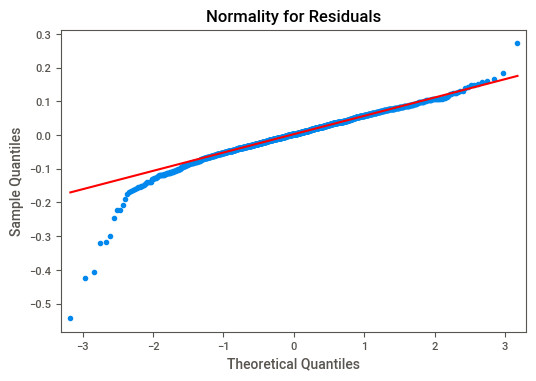

In [102]:
qqplot6=sm.qqplot(model6.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

# Residuals Analysis


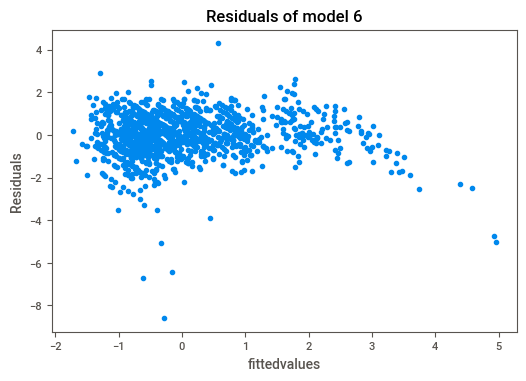

In [103]:
plt.scatter(get_standardized_values(model6.fittedvalues),
           get_standardized_values(model6.resid))
plt.title('Residuals of model 6')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

# RMSE- Root Mean Squared Error


In [104]:
mse_m6= mean_squared_error(normdf_sqrt.Price,model6.fittedvalues) #checking for RMSE value 
rmse_m6=math.sqrt(mse_m6)
print("the difference between actual and predicted values of model6 is :---",rmse_m6)


the difference between actual and predicted values of model6 is :--- 0.06318134236728547


# Model 7 Creation by transforming Dataset using tan hyperbolic 

In [105]:
#normdf1['Age_08_04']= np.tanh(normdf['Age_08_04']) #tranforming data to hyperbolic tan on  all the columns to avoid pattern in residuals vs fitted Values
#normdf1['KM']=np.tanh(normdf['KM'])
#normdf1['HP']=np.tanh(normdf['HP'])
#normdf1['cc']=np.tanh(normdf['cc'])
#normdf1['Doors']=np.tanh(normdf['Doors'])
#normdf1['Weight']=np.tanh(normdf['Weight'])
#normdf1['Price']=np.tanh(normdf['Price'])
normdf_tanh=np.tanh(normdf)
normdf_tanh

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.49,0.27,0.25,0.42,0.76,0.32,0.76,0.67
1,0.50,0.27,0.38,0.42,0.76,0.32,0.76,0.67
2,0.51,0.28,0.23,0.42,0.76,0.32,0.76,0.67
3,0.55,0.31,0.26,0.42,0.76,0.32,0.76,0.67
4,0.50,0.35,0.21,0.42,0.76,0.32,0.76,0.68
...,...,...,...,...,...,...,...,...
1325,0.18,0.70,0.11,0.35,0.00,0.32,0.26,0.12
1326,0.36,0.72,0.10,0.35,0.00,0.32,0.26,0.07
1327,0.24,0.71,0.09,0.35,0.00,0.32,0.26,0.07
1328,0.17,0.70,0.09,0.35,0.00,0.32,0.26,0.07


In [106]:
model7=smf.ols('Price~Age_08_04+KM+HP+Weight',data=normdf_tanh).fit()


In [107]:
model7.params


Intercept    0.69
Age_08_04   -0.63
KM          -0.20
HP           0.06
Weight       0.15
dtype: float64

In [108]:
model7.tvalues, '\n',model7.pvalues


(Intercept    68.28
 Age_08_04   -45.18
 KM          -15.05
 HP            7.21
 Weight       12.52
 dtype: float64,
 '\n',
 Intercept   0.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 Weight      0.00
 dtype: float64)

In [109]:
model7.rsquared

0.8465225795133491

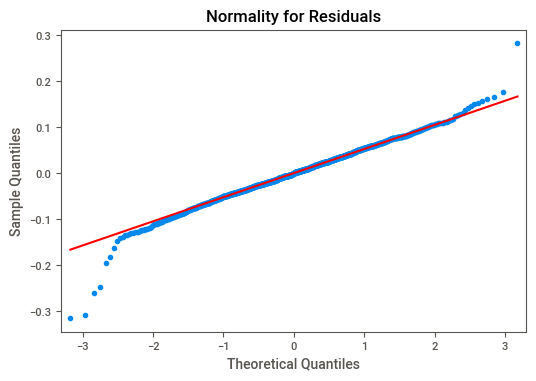

In [110]:
# Residual Plot for Homoscedasticity
qqplot7=sm.qqplot(model7.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

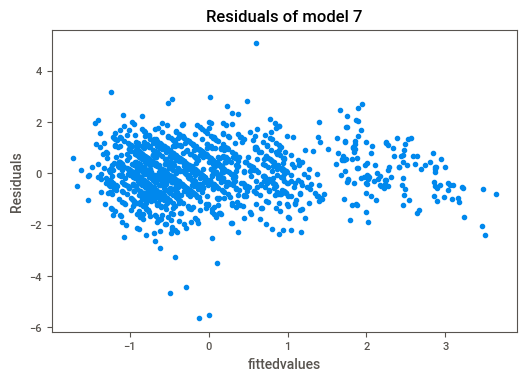

In [111]:
# Residuals Analysis
plt.scatter(get_standardized_values(model7.fittedvalues),
           get_standardized_values(model7.resid))
plt.title('Residuals of model 7')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

In [112]:
# RMSE- Root Mean Squared Error
mse_m7= mean_squared_error(normdf_tanh.Price,model7.fittedvalues) #checking for RMSE value 
rmse_m7=math.sqrt(mse_m7)
print("the difference between actual and predicted values of model7 is :---",rmse_m7)

the difference between actual and predicted values of model7 is :--- 0.055733523652967264


# Model 8 Creation using BOX-COX Transformation

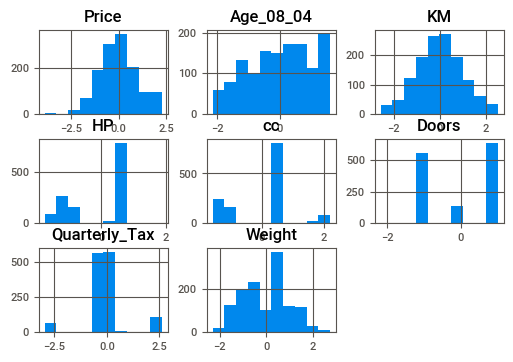

In [113]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
norm=MinMaxScaler(feature_range=(1,2)) #feature scaling Dataset in between 1 to 2
boxcox=PowerTransformer(method='box-cox') #we can use 'Yeo-Johnson' also for data transformation
pipeline=Pipeline(steps=[('s',norm),('p',boxcox)])
data=pipeline.fit_transform(df2)
#converting array back to Dataframe
columns=df2.columns
boxcoxdf=pd.DataFrame(data,columns=columns)
boxcoxdf.hist()
plt.show()

In [114]:
boxcoxdf

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,1.14,-1.67,-0.55,-1.17,2.20,-1.11,2.63,2.20
1,1.20,-1.67,0.28,-1.17,2.20,-1.11,2.63,2.20
2,1.24,-1.64,-0.74,-1.17,2.20,-1.11,2.63,2.20
3,1.45,-1.58,-0.51,-1.17,2.20,-1.11,2.63,2.20
4,1.20,-1.45,-0.86,-1.17,2.20,-1.11,2.63,2.27
...,...,...,...,...,...,...,...,...
1325,-1.17,0.66,-1.59,-1.35,-1.58,-1.11,-0.34,-1.21
1326,0.39,0.90,-1.65,-1.35,-1.58,-1.11,-0.34,-1.62
1327,-0.61,0.82,-1.74,-1.35,-1.58,-1.11,-0.34,-1.62
1328,-1.33,0.74,-1.75,-1.35,-1.58,-1.11,-0.34,-1.62


In [115]:
model8=smf.ols('Price~Age_08_04+KM+HP+Weight',data=boxcoxdf).fit()
model8.params


Intercept   -0.00
Age_08_04   -0.61
KM          -0.29
HP           0.08
Weight       0.17
dtype: float64

In [116]:
model8.tvalues, '\n',model8.pvalues


(Intercept    -0.00
 Age_08_04   -34.74
 KM          -17.76
 HP            5.55
 Weight       11.13
 dtype: float64,
 '\n',
 Intercept   1.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 Weight      0.00
 dtype: float64)

In [117]:
model8.rsquared


0.7691325261562465

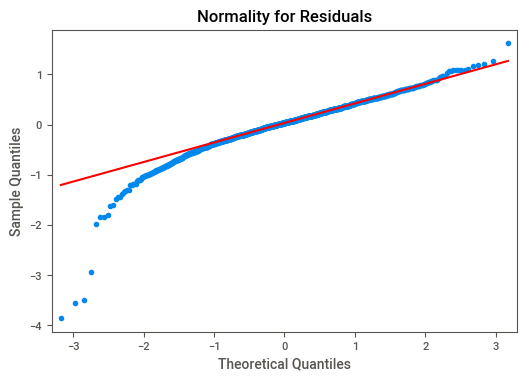

In [118]:
# Residual Plot for Homoscedasticity
qqplot8=sm.qqplot(model8.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

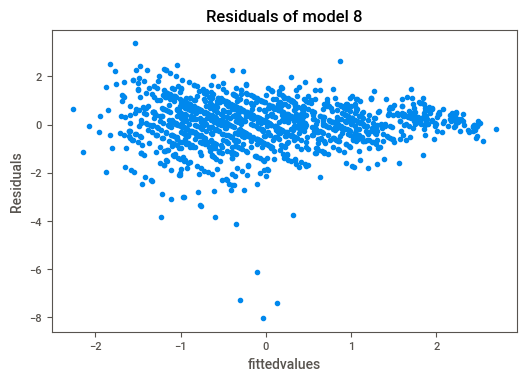

In [119]:
# Residuals Analysis
plt.scatter(get_standardized_values(model8.fittedvalues),
           get_standardized_values(model8.resid))
plt.title('Residuals of model 8')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()



In [120]:

# RMSE- Root Mean Squared Error
mse_m8= mean_squared_error(boxcoxdf.Price,model8.fittedvalues) #checking for RMSE value 
rmse_m8=math.sqrt(mse_m8)
print("the difference between actual and predicted values of model8 is :---",rmse_m8)


the difference between actual and predicted values of model8 is :--- 0.48048670516857533


# Model9 Creation by using YEO-JOHNSON transformation

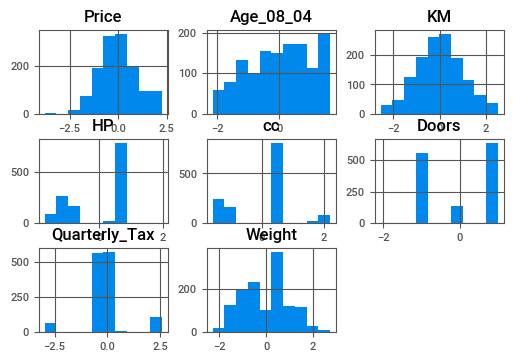

In [121]:
power=PowerTransformer(method='yeo-johnson')
pipeline=Pipeline(steps=[('s',norm),('p',power)])
yeo_john=pipeline.fit_transform(df2)
#converting array back to dataframe
yeo_johndf=pd.DataFrame(yeo_john,columns=columns)
yeo_johndf.hist()
plt.show()

In [122]:
model9=smf.ols('Price~Age_08_04+KM+HP+Weight',data=yeo_johndf).fit()


In [123]:
model9.params


Intercept   -0.00
Age_08_04   -0.61
KM          -0.29
HP           0.08
Weight       0.17
dtype: float64

In [124]:
model9.tvalues, '\n',model9.pvalues


(Intercept    -0.00
 Age_08_04   -35.01
 KM          -17.93
 HP            5.52
 Weight       11.30
 dtype: float64,
 '\n',
 Intercept   1.00
 Age_08_04   0.00
 KM          0.00
 HP          0.00
 Weight      0.00
 dtype: float64)

In [125]:
model9.rsquared

0.7712338080849936

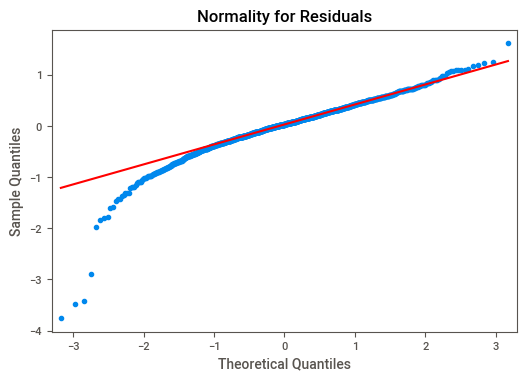

In [126]:

# Residual Plot for Homoscedasticity
qqplot9=sm.qqplot(model9.resid,line='q')
plt.title("Normality for Residuals")
plt.show()

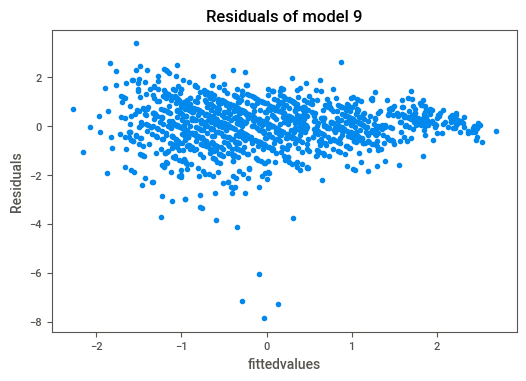

In [127]:

# Residuals Analysis
plt.scatter(get_standardized_values(model9.fittedvalues),
           get_standardized_values(model9.resid))
plt.title('Residuals of model 9')
plt.xlabel('fittedvalues')
plt.ylabel('Residuals')
plt.show()

In [128]:
# RMSE- Root Mean Squared Error
mse_m9= mean_squared_error(yeo_johndf.Price,model9.fittedvalues) #checking for RMSE value 
rmse_m9=math.sqrt(mse_m9)
print("the difference between actual and predicted values of model9 is :---",rmse_m9)


the difference between actual and predicted values of model9 is :--- 0.4782950887423018


In [129]:
print("Model1_Adjusted_Rsquared:",model.rsquared_adj,"\n","Model2_Adjusted_Rsquared:",model2.rsquared_adj,"\n","Model3_Adjusted_Rsquared:",model3.rsquared_adj,"\n","Model4_Adjusted_Rsquared:",model4.rsquared_adj,"\n","Model5_Adjusted_Rsquared:",model5.rsquared_adj,"\n","Model6_Adjusted_Rsquared:",model6.rsquared_adj,"\n","Model7_Adjusted_Rsquared:",model7.rsquared_adj,"\n","Model8_Adjusted_Rsquared:",model8.rsquared_adj,"\n","Model9_Adjusted_Rsquared:",model9.rsquared_adj)


Model1_Adjusted_Rsquared: 0.856330977361006 
 Model2_Adjusted_Rsquared: 0.856400225990281 
 Model3_Adjusted_Rsquared: 0.8519582250697769 
 Model4_Adjusted_Rsquared: 0.8501415791173654 
 Model5_Adjusted_Rsquared: 0.726438108029038 
 Model6_Adjusted_Rsquared: 0.7983424184067633 
 Model7_Adjusted_Rsquared: 0.8460592514515026 
 Model8_Adjusted_Rsquared: 0.7684355677446427 
 Model9_Adjusted_Rsquared: 0.770543193166005


In [130]:
print("RMSE-Model1---",np.round(rmse_m1,4),"\n", "RMSE-Model 2---",np.round(rmse_m2,4), "\n","RMSE-Model 3---", np.round(rmse_m3,4),"\n", "RMSE-Model4---", np.round(rmse_m4,4),"\n", "RMSE-Model5---", np.round(rmse_m5,4),"\n", "RMSE-Model6---", np.round(rmse_m6,4),"\n", "RMSE-Model7---", np.round(rmse_m7,4),"\n", "RMSE-Model8---", np.round(rmse_m8,4),"\n", "RMSE-Model9---", np.round(rmse_m9,4))


RMSE-Model1--- 0.0671 
 RMSE-Model 2--- 0.0671 
 RMSE-Model 3--- 0.0556 
 RMSE-Model4--- 0.0476 
 RMSE-Model5--- 0.0587 
 RMSE-Model6--- 0.0632 
 RMSE-Model7--- 0.0557 
 RMSE-Model8--- 0.4805 
 RMSE-Model9--- 0.4783


In [131]:
#columns=['Model1','Model2','Model3','Model4','Model5','Model6']
#RMSE=[rmse_m1,rmse_m2,rmse_m3,rmse_m4,rmse_m5,rmse_m6]
data={'Model':['Model1','Model2','Model3','Model4','Model5','Model6','Model7','Model8','Model9'],'RMSE_Value':[rmse_m1,rmse_m2,rmse_m3,rmse_m4,rmse_m5,rmse_m6,rmse_m7,rmse_m8,rmse_m9]}
RMSE_df=pd.DataFrame(data=data)
#np.min(np.round(RMSEdf,4))
RMSE_df=RMSE_df.set_index('Model')
RMSE_df

,RMSE_Value
Model,
Model1,0.07
Model2,0.07
Model3,0.06
Model4,0.05
Model5,0.06
Model6,0.06
Model7,0.06
Model8,0.48
Model9,0.48


In [132]:
np.min(np.round(RMSE_df.RMSE_Value,4))

0.0476

In [133]:
np.where(RMSE_df.RMSE_Value==np.min(RMSE_df.RMSE_Value))

(array([3], dtype=int64),)

In [134]:
from tabulate import tabulate

In [135]:

#Creating Table to compare all model's Rsquared(model validation accuracy),AIC(Akaik Information Criteria <<< for Good Model),BIC(Bayesian Info Criteria<<< for Good Model)
table=[['Model no.','Transformation of Dataset','R-Squared','Adj R-Squared','AIC','BIC','RMSE_Value'],
       ['Model 1','Normalised df and without Gears column',model.rsquared,model.rsquared_adj,model.aic,model.bic,rmse_m1],
       ['Model 2','Without Quarterly Tax Column',model2.rsquared,model2.rsquared_adj,model2.aic,model2.bic,rmse_m2],
       ['Model 3','Inverse Tan Transformation',model3.rsquared,model3.rsquared_adj,model3.aic,model3.bic,rmse_m3],
       ['Model 4','Log1p Transformation',model4.rsquared,model4.rsquared_adj,model4.aic,model4.bic,rmse_m4],
       ['Model 5','Cube Root Transformation',model5.rsquared,model5.rsquared_adj,model5.aic,model5.bic,rmse_m5],
       ['Model 6','Square Root Transformation',model6.rsquared,model6.rsquared_adj,model6.aic,model6.bic,rmse_m6],
       ['Model 7','Hyperbolic tan Transformation',model7.rsquared,model7.rsquared_adj,model7.aic,model7.bic,rmse_m7],
       ['Model 8','BOX-COX Transformation',model8.rsquared,model8.rsquared_adj,model8.aic,model8.bic,rmse_m8],
       ['Model 9','YEO-JOHNSON Transformation',model9.rsquared,model9.rsquared_adj,model9.aic,model9.bic,rmse_m9]]

In [136]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid', showindex=range(1,10)))

╒════╤═════════════╤════════════════════════════════════════╤═════════════╤═════════════════╤══════════╤══════════╤══════════════╕
│    │ Model no.   │ Transformation of Dataset              │   R-Squared │   Adj R-Squared │      AIC │      BIC │   RMSE_Value │
╞════╪═════════════╪════════════════════════════════════════╪═════════════╪═════════════════╪══════════╪══════════╪══════════════╡
│  1 │ Model 1     │ Normalised df and without Gears column │    0.857088 │        0.856331 │ -3397.18 │ -3355.64 │    0.0670652 │
├────┼─────────────┼────────────────────────────────────────┼─────────────┼─────────────────┼──────────┼──────────┼──────────────┤
│  2 │ Model 2     │ Without Quarterly Tax Column           │    0.857049 │        0.8564   │ -3398.82 │ -3362.47 │    0.0670744 │
├────┼─────────────┼────────────────────────────────────────┼─────────────┼─────────────────┼──────────┼──────────┼──────────────┤
│  3 │ Model 3     │ Inverse Tan Transformation             │    0.852515 │        

# Model 4 is log1p transformation Dataset Whose RMSE value is 0.0476 and Adjusted RSQUARED 85.04% accuracy 


In [137]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1509.
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:37:38   Log-Likelihood:                 2163.9
No. Observations:                1330   AIC:                            -4316.
Df Residuals:                    1324   BIC:                            -4285.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5808      0.009     63.662      0.000       0.563       0.599
Age_08_04     -0.5799      0.013    -44.004      0.000      -0.606      -0.554
KM            -0.1842      0.013    -13.841      0.000      -0.210      -0.158
HP             0.0676      0.008      8.445      0.000       0.052       0.083
cc            -0.0629      0.011     -5.633      0.000      -0.085      -0.041
Weight         0.2258      0.017     13.516      0.000       0.193       0.259
==============================================================================
Omnibus:                      105.513   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.916
Skew:                          -0.328   Prob(JB):                     2.86e-81
Kurtosis:                       5.503   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lets use Model4 Dataset to see which Algorithm best fits this Dataset by using LazyPredict

In [138]:
normdf_log1p.head()

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,0.43,0.25,0.23,0.37,0.69,0.29,0.69,0.59
1,0.44,0.25,0.34,0.37,0.69,0.29,0.69,0.59
2,0.44,0.26,0.21,0.37,0.69,0.29,0.69,0.59
3,0.48,0.27,0.24,0.37,0.69,0.29,0.69,0.59
4,0.44,0.31,0.19,0.37,0.69,0.29,0.69,0.60


In [139]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


X=normdf_log1p.iloc[:,1:]
Y=normdf_log1p.iloc[:,:1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric= mean_absolute_percentage_error)
models2,predicions=reg.fit(x_train,x_test,y_train,y_test)
print(models2)

 21%|██▏       | 9/42 [00:00<00:01, 31.26it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████| 42/42 [00:14<00:00,  2.83it/s]

                               Adjusted R-Squared  R-Squared  RMSE  \
Model                                                                
GradientBoostingRegressor                    0.85       0.85  0.05   
RandomForestRegressor                        0.84       0.85  0.05   
BaggingRegressor                             0.84       0.84  0.05   
LGBMRegressor                                0.84       0.84  0.05   
HistGradientBoostingRegressor                0.84       0.84  0.05   
LassoLarsIC                                  0.83       0.83  0.05   
Lars                                         0.83       0.83  0.05   
TransformedTargetRegressor                   0.83       0.83  0.05   
LinearRegression                             0.83       0.83  0.05   
Ridge                                        0.83       0.83  0.05   
BayesianRidge                                0.83       0.83  0.05   
LassoLarsCV                                  0.83       0.83  0.05   
LassoCV             

# Lets Check models without columns >0.05 which are not impacting our Target Variable

In [140]:
normdf_log1p=normdf_log1p.drop(normdf_log1p[['Quarterly_Tax','Doors','cc']],axis=1)

In [141]:
normdf_log1p.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Weight'], dtype='object')

In [142]:
X=normdf_log1p.iloc[:,1:]
Y=normdf_log1p.iloc[:,:1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [143]:
models3,predicions=reg.fit(x_train,x_test,y_train,y_test)
print(models3)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 29%|██▊       | 12/42 [00:00<00:01, 28.11it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


100%|██████████| 42/42 [00:13<00:00,  3.14it/s]

                               Adjusted R-Squared  R-Squared  RMSE  \
Model                                                                
RandomForestRegressor                        0.86       0.86  0.05   
HistGradientBoostingRegressor                0.85       0.86  0.05   
GradientBoostingRegressor                    0.85       0.86  0.05   
LGBMRegressor                                0.85       0.85  0.05   
NuSVR                                        0.85       0.85  0.05   
BaggingRegressor                             0.84       0.84  0.05   
XGBRegressor                                 0.84       0.84  0.05   
ExtraTreesRegressor                          0.84       0.84  0.05   
KNeighborsRegressor                          0.83       0.83  0.05   
Lars                                         0.83       0.83  0.05   
TransformedTargetRegressor                   0.83       0.83  0.05   
OrthogonalMatchingPursuitCV                  0.83       0.83  0.05   
LinearRegression    

# We can observe that without the Quarterly_Tax,Doors,cc columns, our model accuracy improves, and the best Algorithm has shifted from GradientBoosting to Random Forest.